# ATAC-seq clustering and chromatin analysis

## 1. Cell type clustering 

**Goal**: Visualize sample relationships by signal similarity

### Prepare matrix for PCA, UMAP and t-SNE

In [33]:
import pandas as pd

# Load both matrices 
peak_matrix = pd.read_csv("ATAC-seq/filtered_ATAC_abT_Tact_Stem.csv")
signal_matrix = peak_matrix.iloc[:, 8:] # exclude the first 8 columns since they are annotations and we don't need them

signal_matrix.head()


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,0.11,0.77,0.51,0.49,0.58,0.11,0.67,0.11,1.09,3.23,...,0.71,2.78,0.56,0.11,0.64,1.14,0.41,0.71,0.90,0.11
1,0.77,0.77,0.47,1.56,1.02,0.11,0.73,0.91,0.53,0.84,...,0.94,3.56,0.98,2.12,0.12,0.11,0.41,1.64,0.90,0.83
2,0.40,0.77,0.11,0.10,0.35,0.53,1.08,0.11,0.11,2.04,...,1.32,2.79,0.56,1.72,0.12,0.11,2.36,0.10,0.90,0.11
3,0.46,0.11,0.47,0.10,0.58,0.11,0.17,2.15,0.53,1.25,...,3.41,0.11,2.86,0.11,0.64,2.20,0.41,0.10,0.11,0.11
4,0.77,0.84,1.34,1.69,0.34,0.94,0.40,0.39,0.54,1.89,...,0.94,0.11,1.59,0.51,0.12,0.53,0.41,0.10,0.11,0.11


To run a PCA / UMAP / t-SNE test the dataset should be a numeric matrix which is the case here, however the rows have to represent samples and the columns featurs. This means we first need to transpose the matrix.

In [34]:
import pandas as pd
transposed = signal_matrix.T
transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,512585,512586,512587,512588,512589,512590,512591,512592,512593,512594
preT.DN1.Th,0.11,0.77,0.40,0.46,0.77,0.77,0.40,0.76,0.40,0.11,...,12.97,3.95,2.05,2.09,1.76,3.32,3.56,0.76,0.81,1.61
preT.DN2a.Th,0.77,0.77,0.77,0.11,0.84,0.77,0.84,1.17,0.77,0.43,...,16.90,6.57,3.55,4.64,2.59,5.06,5.76,1.93,0.77,2.44
preT.DN2b.Th,0.51,0.47,0.11,0.47,1.34,0.47,0.47,0.51,0.87,0.99,...,17.03,2.14,5.22,4.17,2.55,3.37,8.18,0.87,0.47,1.78
preT.DN3.Th,0.49,1.56,0.10,0.10,1.69,1.02,0.10,1.14,0.10,0.10,...,9.20,6.41,8.11,7.10,4.00,4.55,10.40,1.56,0.61,1.02
T.DN4.Th,0.58,1.02,0.35,0.58,0.34,0.10,0.58,0.35,0.78,0.35,...,17.73,7.79,6.82,6.93,10.15,8.41,15.50,0.78,0.79,2.38


Now that we have the transposed matrix, we can run the PCA / UMAP and t-SNE tests. 

### Color-code PCA, UMAP and t-SNE according to cell types

In [35]:
from sklearn.decomposition import PCA
import pandas as pd

# Running PCA
subset = transposed
pca = PCA(n_components=2)
pca_result = pca.fit_transform(subset)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=subset.index)
print(pca_df.head())

                      PC1          PC2
preT.DN1.Th  -2483.527611    62.410633
preT.DN2a.Th -2140.412180  -769.626983
preT.DN2b.Th -1128.500533 -1757.960042
preT.DN3.Th   -521.012623 -2065.593603
T.DN4.Th      -144.911908 -1722.877906


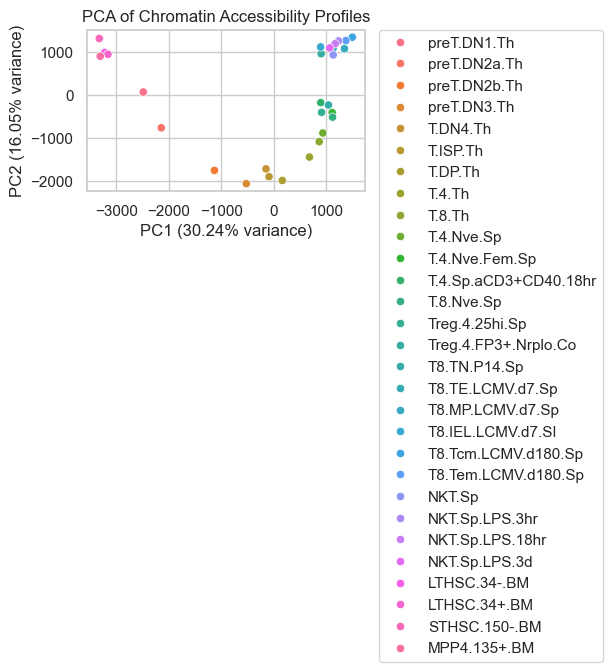

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Plotting color-coded PCA
pca_df = pca_df.reset_index().rename(columns={"index": "CellType"})

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="CellType")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA of Chromatin Accessibility Profiles")

# Moving legend to the side since it was overlapping with the PCA
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()  # adjusting plot to fit everything
plt.show()


**Fig. 1: PCA of Chromatin Accessibility Profiles**

The separation of the cells according to their differential stage is visibile. Early T-cell stages (e. g. preT.DN1.Th etc.) are tightly grouped in the top left corner while later stages are grouped in the top right corner, suggesting chromatin remodelling as differentiation progresses. It also shows big difference in peak accessibility and analogue about the open chromatin regions. The left-to-right spread on the x-axis probably reflects the differential trajectory - so early to mature T-cells. Samples that are grouped together have similar chromatin profiles

The percentage of variance on both axis show how much of the total variability in the data is captured by each PC. Here, we define the variance as the differences in accessibility pattterns across samples. We have together 46,29% of the total variance which is pretty high so we can assume that it gives us goos approximation of the real realtionship of the cells.

The actual values on the axes are coordinates along the principal components.
The scale is interpretable: e.g., a sample at PC1 = 1000 differs more from PC1 = -1000 than from PC1 = 900.
Units reflect contribution from the original features (ATAC-seq signal intensities), though scaled and rotated.

In [37]:
import umap.umap_ as umap

# Running UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(subset)

umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=subset.index)
print(umap_df.head())


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


                 UMAP1     UMAP2
preT.DN1.Th   1.302530 -0.916189
preT.DN2a.Th  1.615988 -1.356894
preT.DN2b.Th  1.861052 -1.990105
preT.DN3.Th   1.510633 -2.306674
T.DN4.Th      1.933604 -2.608651


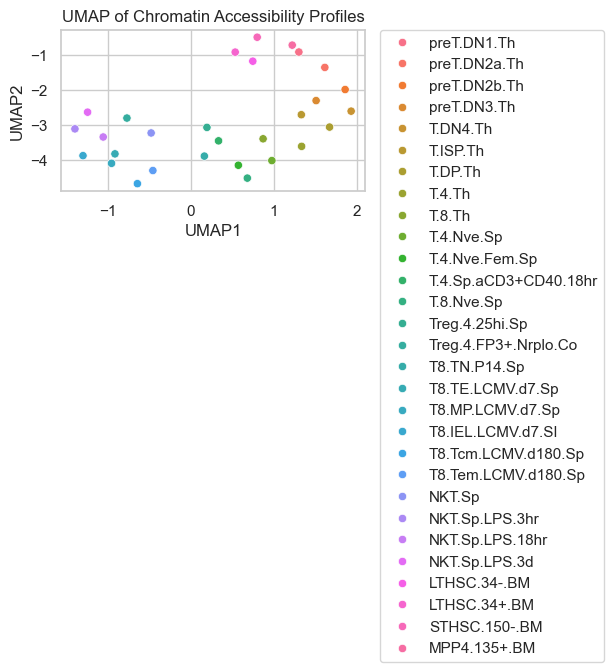

In [38]:
# Plotting color-coded UMAP
umap_df = umap_df.reset_index().rename(columns={"index": "CellType"})

sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType")
plt.title("UMAP of Chromatin Accessibility Profiles")

# Moving legend to the side since it was overlapping 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()  # adjusting plot to fit everything
plt.show()



**Fig. 2: UMAP of Chromatin Accessibility Profiles**

In this plot, the axes reflect similarity, so the closer to dots appear on the graph, the more similar their genome-wide chromatin accessibility profiles are. 

We observe grouping by cell types like preT*, T.4.*, Treg* and T8*. This grouping suggests that the chromatin accessibility profiles encode strong cell identity signals. All in all, the graph reflects progressive chromatin changes during differentiation and the different T-cell subsets are mostly well-separated.

The numbers on the axes don't have absolute meaning or units. They are relative: points closer together in UMAP space are more similar.The axes could be rotated, flipped, or stretched without changing the interpretation.

In [39]:
from sklearn.manifold import TSNE

# Running t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(subset)

tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"], index=subset.index)
print(tsne_df.head())

                 t-SNE1     t-SNE2
preT.DN1.Th   -6.937509 -17.970743
preT.DN2a.Th  -8.311658 -16.087940
preT.DN2b.Th -10.180592 -12.753445
preT.DN3.Th  -11.574150 -10.592682
T.DN4.Th     -12.410466  -7.567062


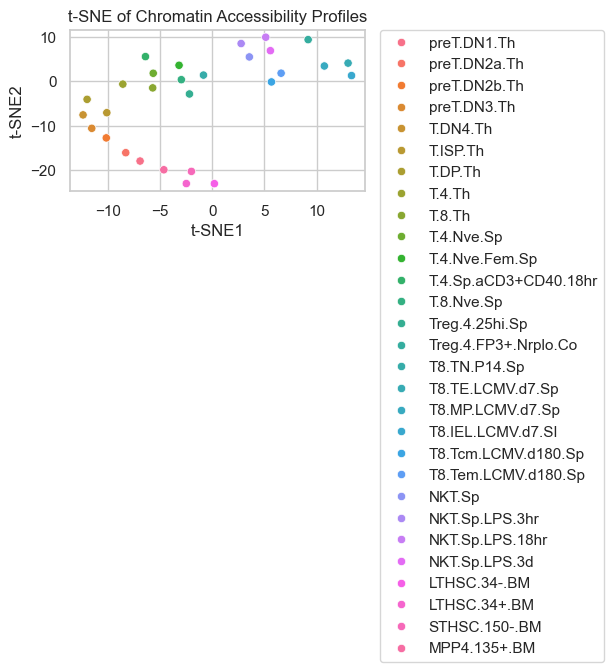

In [40]:

# Plotting color-coded t-SNE
tsne_df = tsne_df.reset_index().rename(columns={"index": "CellType"})

sns.scatterplot(data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType")
plt.title("t-SNE of Chromatin Accessibility Profiles")

# Moving legend to the side since it was overlapping 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()  # adjusting plot to fit everything

plt.show()


**Fig. 3: t-SNE of Chromatin Accessibility Profiles**

Again, we observe clustering by cell types, however, here the clusters appear more tight and distinct, showing a clear highly cell-type specific landscape. 

The curved structure furthermore emphasizes the relationship between early T-cell development to mature T-cell states with the chromatin landscape which is quiescent in early stages and more active in more differentiated cells. 

The graph also shows a strict separation between the progenitor cells and the mature T-cells. Additionlly, the NKT samples are well separated as well which is consistend with their differing regulatory lanscape when compared to other subtypes.

The values on the axes are purely relative — only distances matter, not actual coordinates. We cannot interpret t-SNE1 = 5 as better/worse than t-SNE1 = -5.t-SNE preserves local structure, not global — distances are reliable only within clusters.


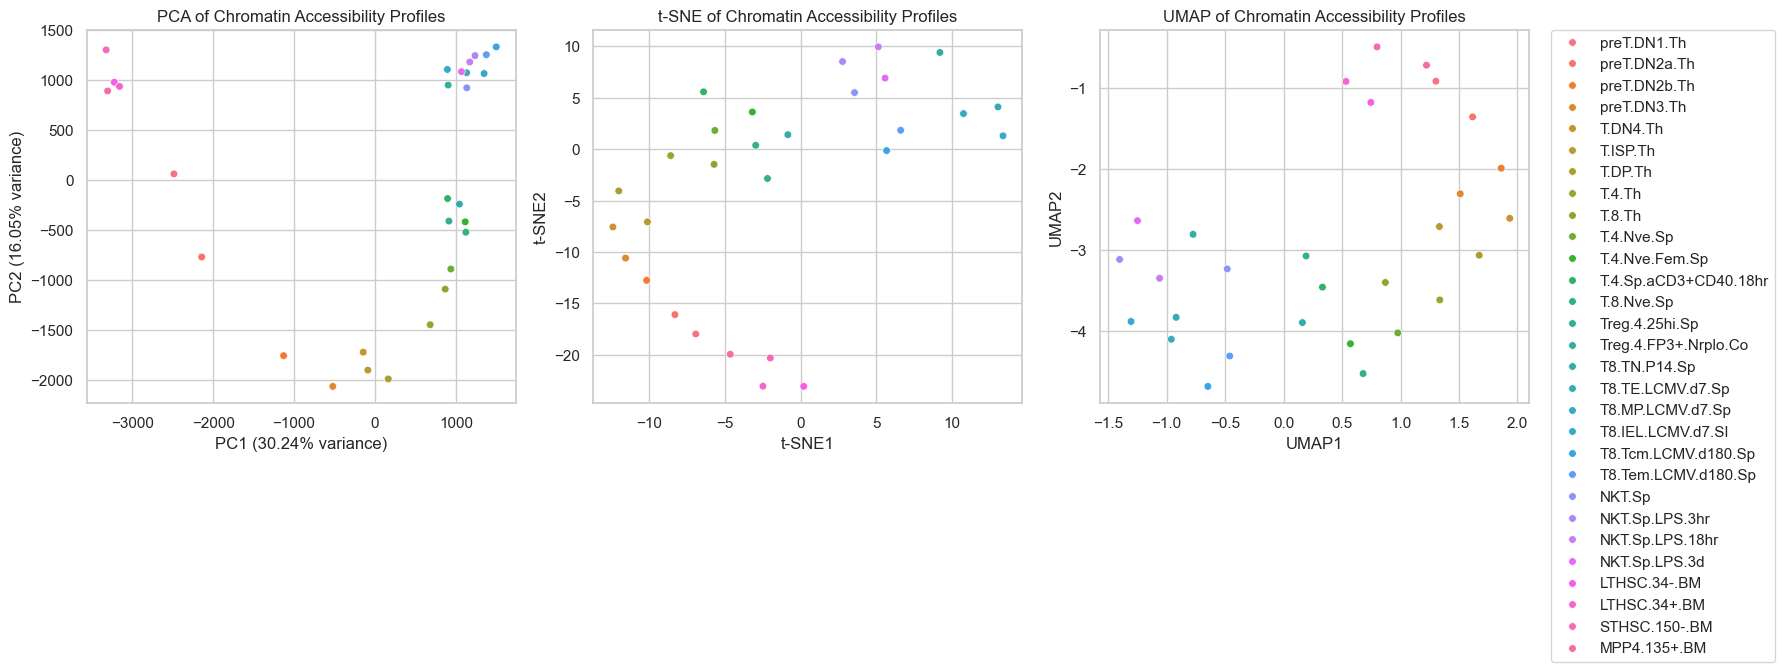

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set(style="whitegrid")

# Creating figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 plots

# Plotting PCA
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="CellType", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of Chromatin Accessibility Profiles")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# Plotting t-SNE 
sns.scatterplot(
    data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of Chromatin Accessibility Profiles")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# Plotting UMAP 
sns.scatterplot(
    data=umap_df, x="UMAP1", y="UMAP2", hue="CellType", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of Chromatin Accessibility Profiles")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Moving legend to the right of the last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


**Fig. 4: Comparison between the PCA, t-SNE and UMAP (from left to right) tests**

PCA, UMAP and t-SNE are shown next to each other for a comparison.


### Color-code PCA, UMAP and t-SNE according to cell groups (abT, Tact and Progenitor)

After comparing the cell types individually, we now also want to compare them according to the cell groups they correspond to - so abT, Tact and progenitor cells. We will again do PCA, UMAP and t-SNE according to those three groups only.

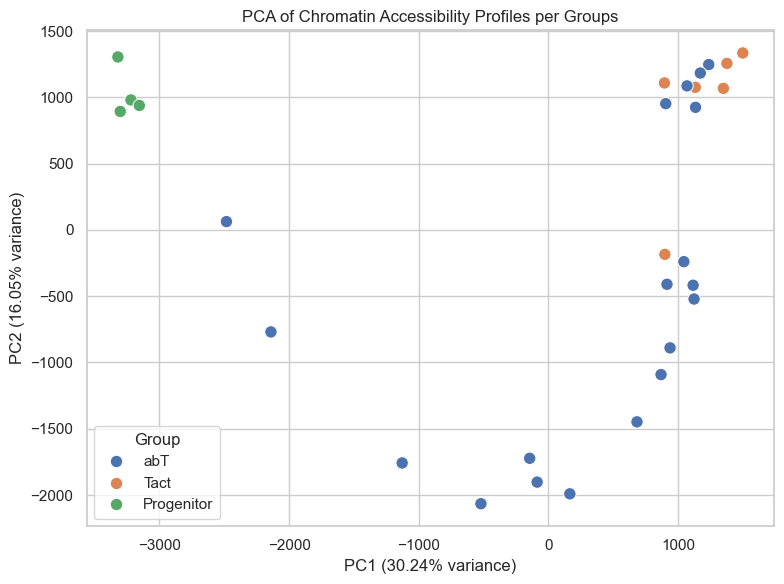

In [42]:
## For PCA
# Loading PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed)

# Setting index from transposed (has row names as sample names)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)

# Grouping cell subtypes into bigger cellular families
abT_cells = ["preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th","T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp","NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"]

tact_cells = ["T.4.Sp.aCD3+CD40.18hr",
    "T8.TE.LCMV.d7.Sp",
    "T8.MP.LCMV.d7.Sp",
    "T8.IEL.LCMV.d7.SI",
    "T8.Tcm.LCMV.d180.Sp",
    "T8.Tem.LCMV.d180.Sp"]

stem_cells = [ "LTHSC.34-.BM", "LTHSC.34+.BM",
    "STHSC.150-.BM", "MPP4.135+.BM"]

# Mapping each cell to its group
group_map = {}

for sample in abT_cells:
    group_map[sample] = "abT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"

# Adding group to PCA
pca_df["Group"] = pca_df.index.map(lambda name: group_map.get(name, "Other"))

# Plotting PCA
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", s=80)
plt.title("PCA of Chromatin Accessibility Profiles per Groups")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.tight_layout()
plt.show()


**Fig. 5: PCA of Chromatin Accessibility Profiles per Groups**

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


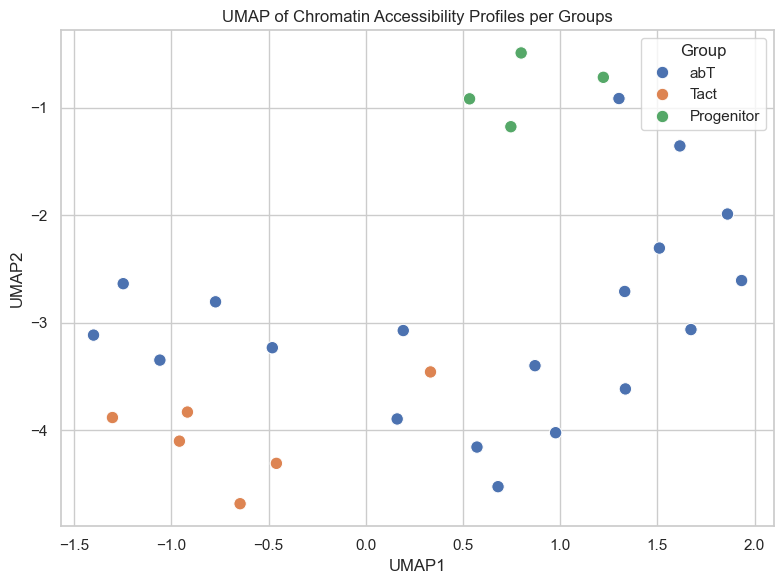

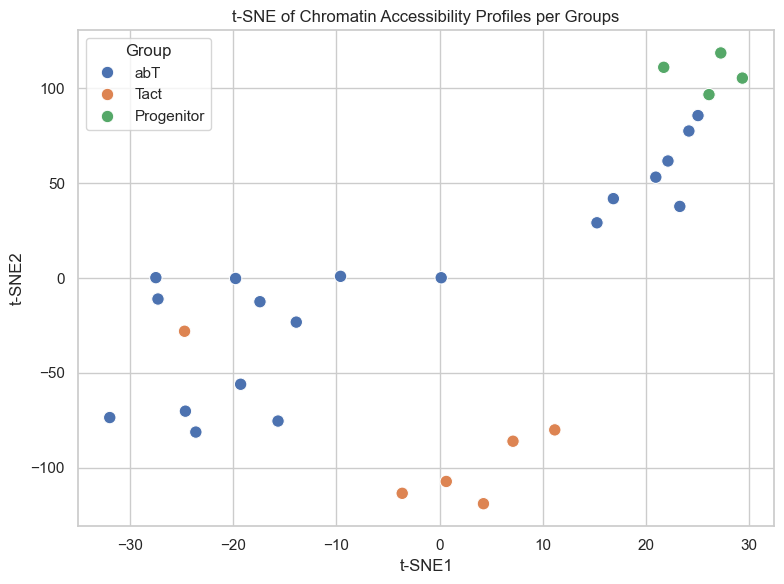

In [43]:
## For UMAP and t-SNE
# Re-running UMAP and t-SNE to assign results to umap_result and tsne_result for easier working
from umap import UMAP
from sklearn.manifold import TSNE

umap_result = UMAP(n_components=2, random_state=42).fit_transform(transposed)
tsne_result = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(transposed)

# Adding results to pca_df so that same cell type grouping can be applied
pca_df[["UMAP1", "UMAP2"]] = umap_result
pca_df[["tSNE1", "tSNE2"]] = tsne_result

# Plotting UMAP
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=80)
plt.title("UMAP of Chromatin Accessibility Profiles per Groups")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# Plotting t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=80)
plt.title("t-SNE of Chromatin Accessibility Profiles per Groups")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.tight_layout()
plt.show()


**Fig. 6: UMAP (upper graph) and t-SNE (lower graph) of Chromatin Accessibility Profiles per Groupes**

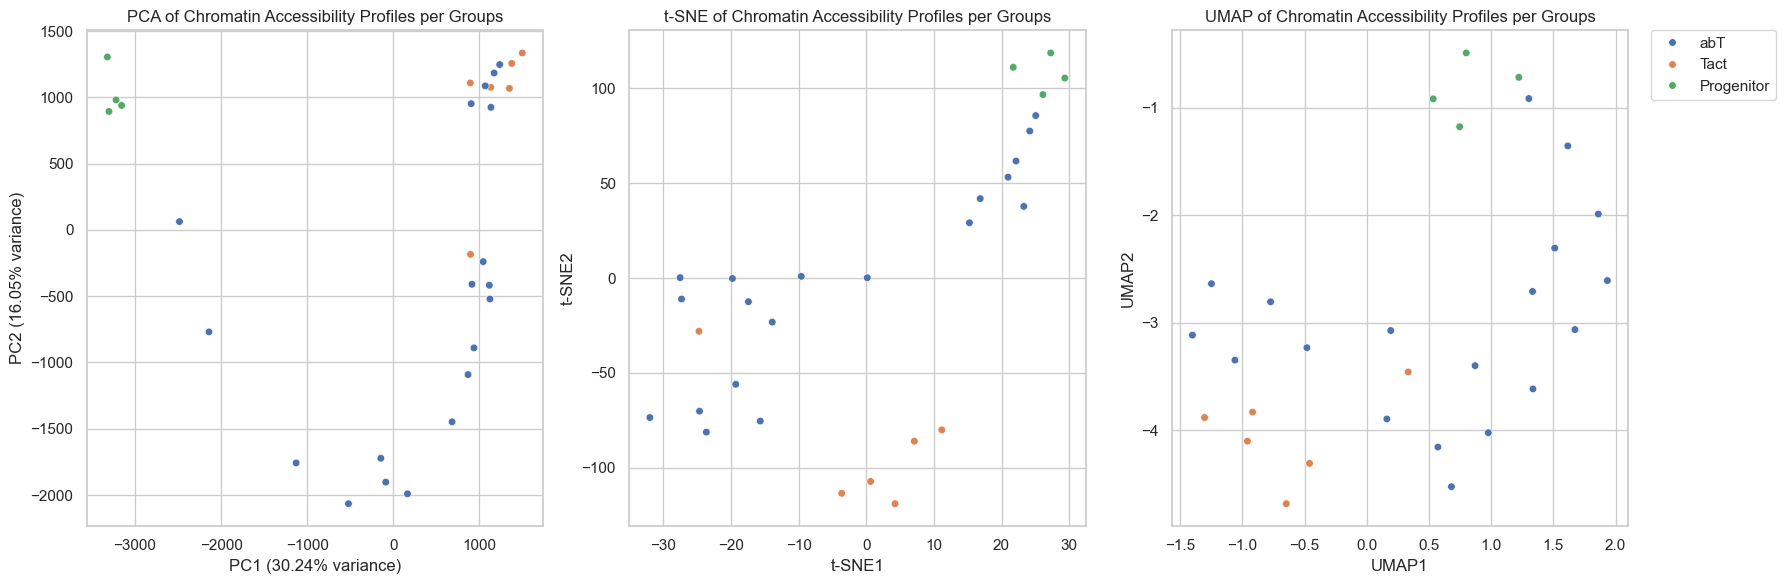

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Group", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of Chromatin Accessibility Profiles per Groups")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# t-SNE plot
sns.scatterplot(
    data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of Chromatin Accessibility Profiles per Groups")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# UMAP plot
sns.scatterplot(
    data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of Chromatin Accessibility Profiles per Groups")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Move legend to the right of the last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Final layout adjustment
plt.tight_layout()
plt.show()


**Fig. 7: PCA, t-SNE and UMAP (from left to right) of Chromatin Accessibility Profiles per Groups for comparison**

In all 3 graphs we can clearly distinguish between the three different cellular groups (abT, Tact and progenitor cells). All progenitor and all Tact cells cluster together, respectively, while the abT cells are more spread out. This suggests that the chromatin landscapes are similar within the progenitor and the Tact cells, but differ a lot within the abT cells likely due to their heterogeneity and functional differences throughout differentiation.

## 2. Chromatin similarity matrix

**Goal**: Assess how similar or different chromatin accessibility profiles are across cell types based on ATAC-seq data.

This results will support the interpretation of PCA, UMAP and t-SNE plots with quantitative metrics. We are computing both for Pearson correlation and Euclidean distance.

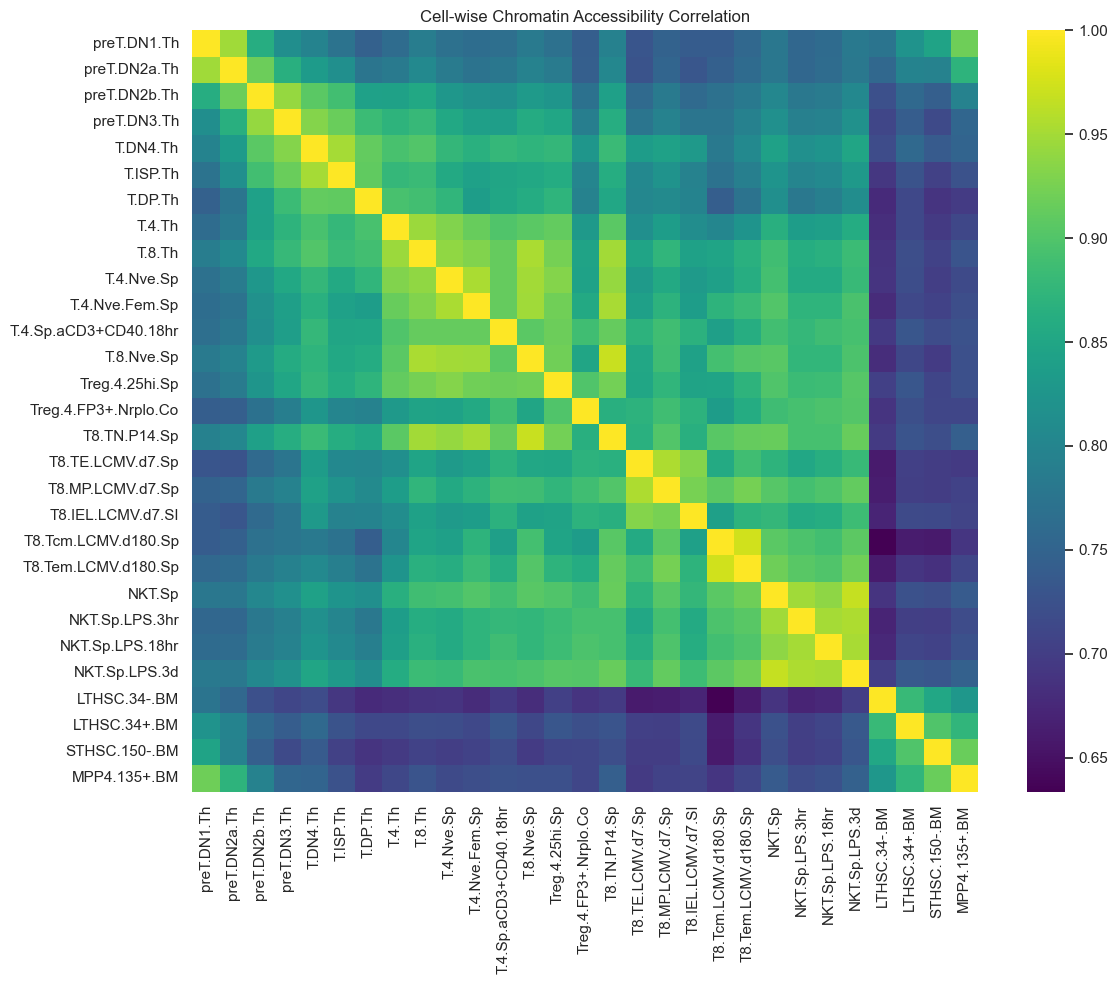

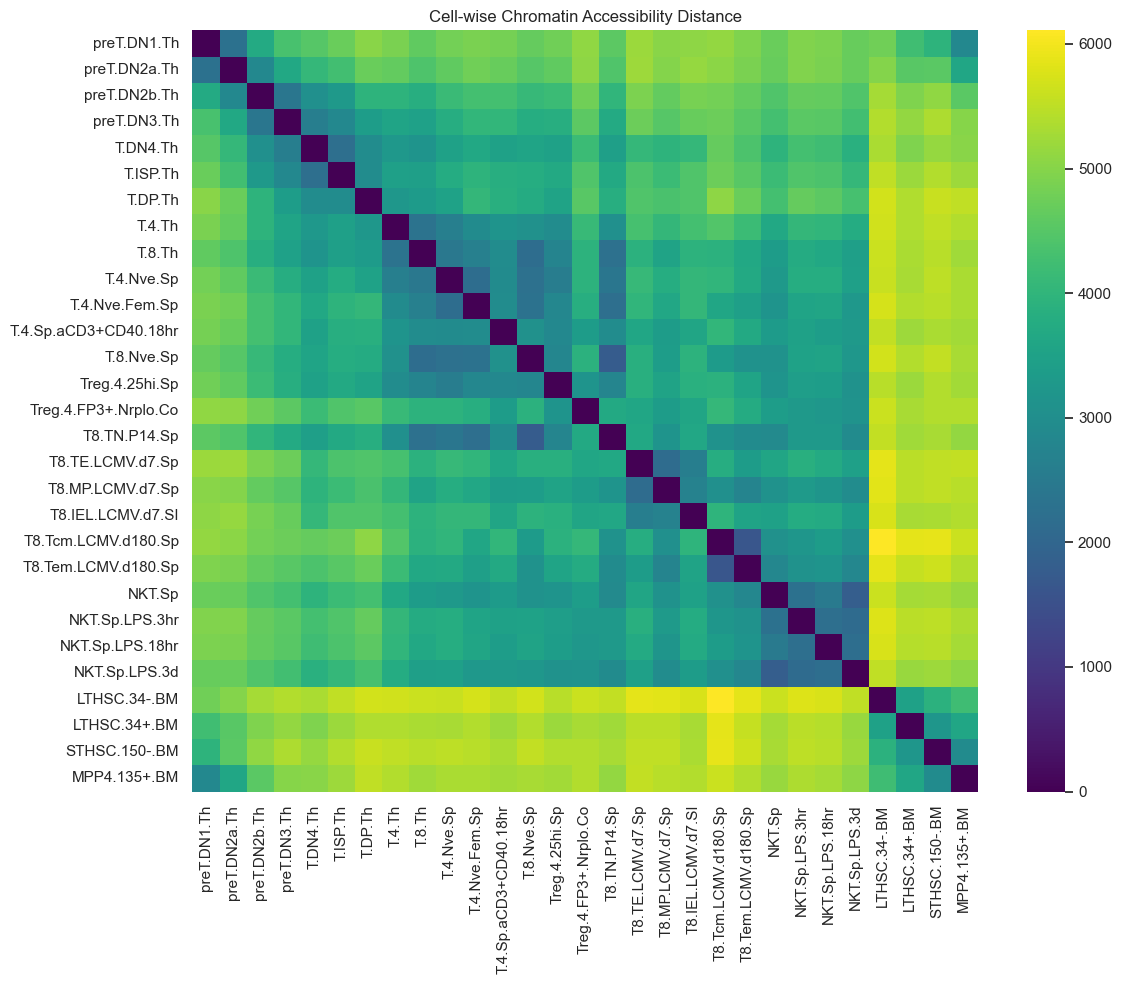

In [45]:
# Loading the matrix (again)
sample_matrix = transposed

# Computing pairwise correlation matrix (Pearson correlation between samples)
correlation_matrix = sample_matrix.T.corr()

# Computing pairwise distance matrix (Euclidean distance between rows)
from scipy.spatial.distance import pdist, squareform
import pandas as pd

distance_matrix = pd.DataFrame(
    squareform(pdist(sample_matrix, metric='euclidean')),
    index=sample_matrix.index,
    columns=sample_matrix.index
)

## Plotting heatmap with sample names 
import seaborn as sns
import matplotlib.pyplot as plt

# For correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Cell-wise Chromatin Accessibility Correlation")
plt.tight_layout()
plt.show()

# For distance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Cell-wise Chromatin Accessibility Distance")
plt.tight_layout()
plt.show()


**Fig. 8: Correlation (upper) and distance (lower) heatmaps of sample-wise chromatin accessibility.**

Here, we are able to see again how the different cell subtypes correlate with each other based on their chromatin landscape as per peak regions. In both heatmaps we can see a clear distinguishment for the progenitor cell types and NKT cells in comparison to the other abT and Tact cells where the difference is not so clearly visible suggesting similar chromatin landscapes between them.

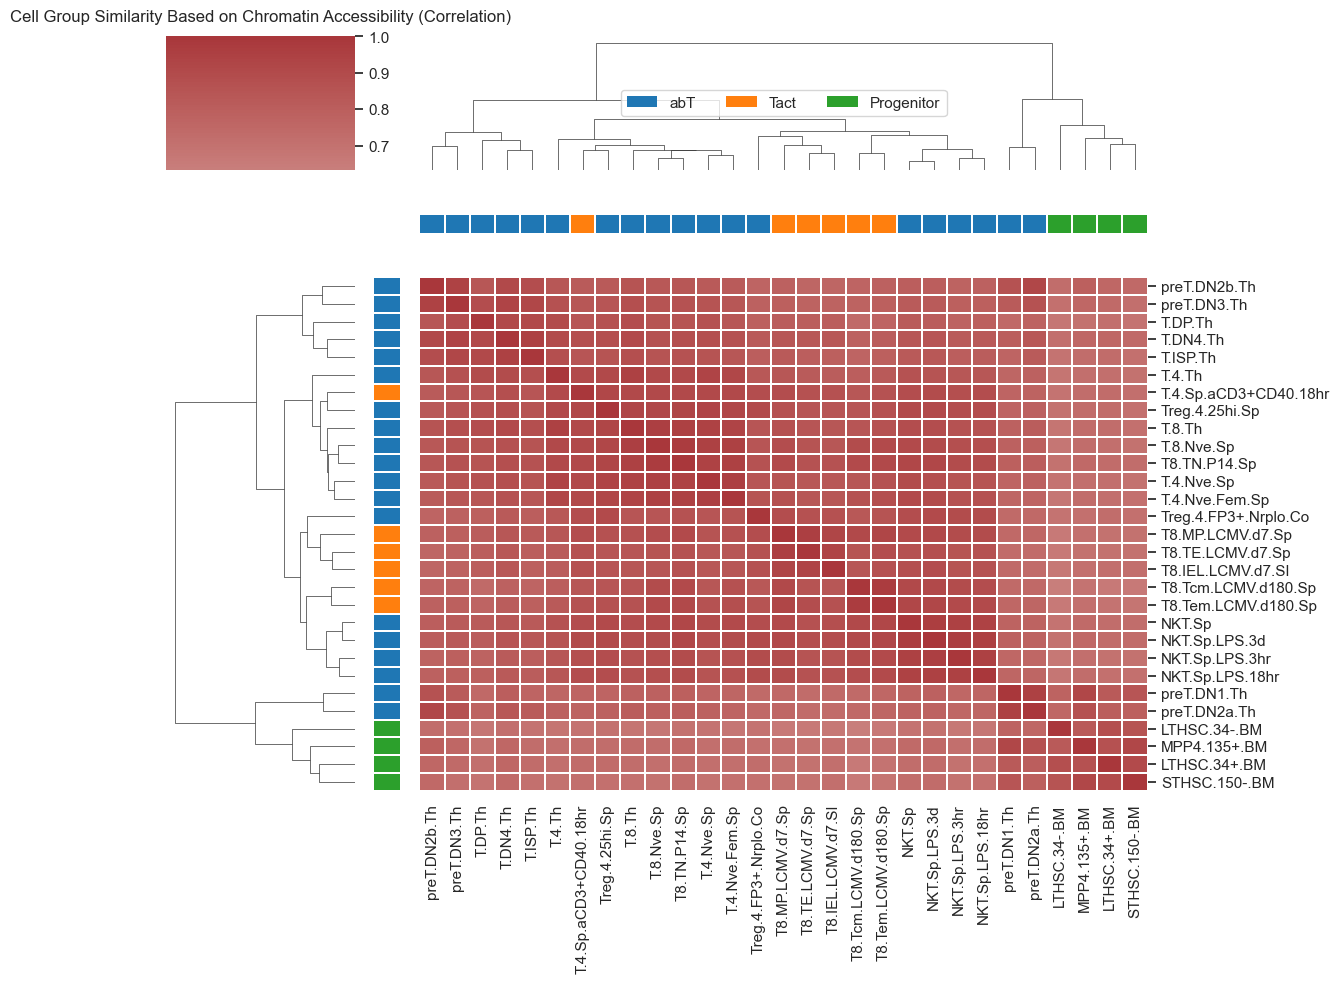

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


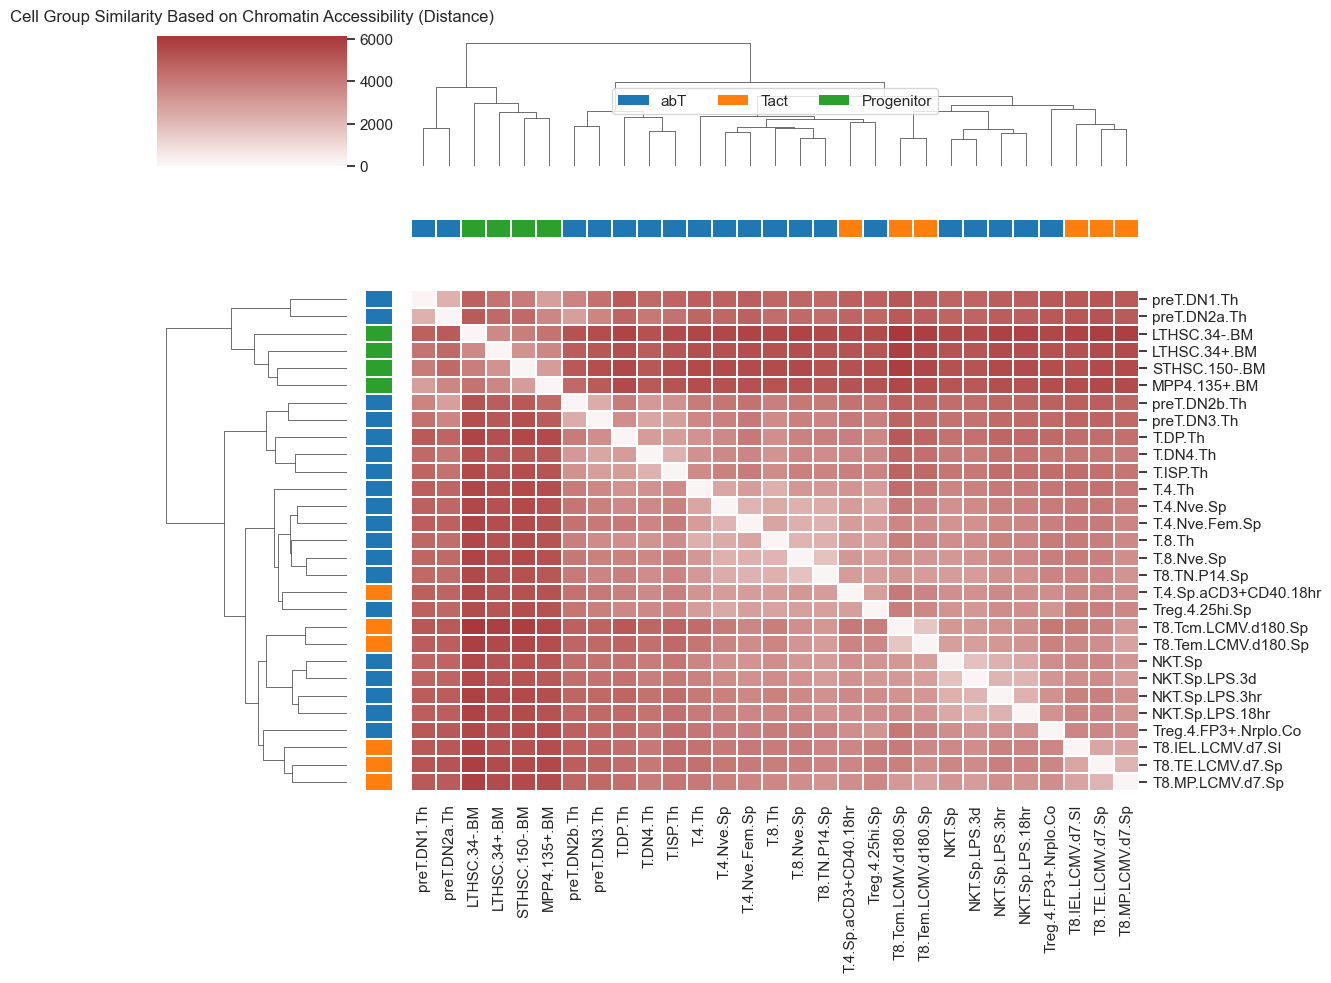

In [47]:
# Correlation and distance matrix per cell groups (abT, Tact and progenitor)
## Preparing group mapping 
group_series = pca_df["Group"] # works because the group info is already added to the PCA DataFrame

## Creating color palette for row labels
import seaborn as sns

group_palette = {
    "abT": "#1f77b4",         # blue
    "Tact": "#ff7f0e",        # orange
    "Progenitor": "#2ca02c"   # green
}

### Creating a color list in the same order as correlation_matrix rows
row_colors = correlation_matrix.index.map(group_series).map(group_palette)

### Create a color list in the same order as distance_matrix rows
row_colors = distance_matrix.index.map(group_series).map(group_palette)

## Plotting heatmap with colored labels
import seaborn as sns
import matplotlib.pyplot as plt

### For correlation_matrix
sns.set(style="white")
g = sns.clustermap(
    correlation_matrix,
    row_colors=row_colors,
    col_colors=row_colors,
    figsize=(12, 10),
    cmap="vlag",  
    center=0,
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=3)

plt.title("Cell Group Similarity Based on Chromatin Accessibility (Correlation)", y=1.05)
plt.tight_layout()
plt.show()

### For distance_matrix
sns.set(style="white")
g = sns.clustermap(
    distance_matrix,
    row_colors=row_colors,
    col_colors=row_colors,
    figsize=(12, 10),
    cmap="vlag",  
    center=0,
    linewidths=0.1
)

for label in group_palette:
    g.ax_col_dendrogram.bar(0, 0, color=group_palette[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc="center", ncol=3)

plt.title("Cell Group Similarity Based on Chromatin Accessibility (Distance)", y=1.05)
plt.tight_layout()
plt.show()



**Fig. 9: Correlation (upper) and distance (lower) heatmaps for cell group similarity based chromatin accessibility profiles**

The differences and similarities between the cells is more visible in Fig. 8, but the trend is visualised in Fig. 9 as well. The correlation heatmap does not show much since the colors are too equal, but the distance heatmaps does give us some information on how the three big cell groups cluster between eacht other.

## 3. Peak Clustering